# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = 'http://api.openweathermap.org/geo/1.0/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'direct?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_info = requests.get(city_url).json()
        lat = city_info[0]['lat']
        lon = city_info[0]['lon']
        city_weather = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={weather_api_key}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.gmtime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": time.asctime(city_date)})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bom sucesso
Processing Record 3 of Set 1 | haiku-pauwela
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | gizo
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | xichang
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | sinop
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | namibe
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | hinton
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sao joao da barra
Processing Re

Processing Record 39 of Set 4 | khanty-mansiysk
Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | sandnessjoen
Processing Record 42 of Set 4 | sao jose da coroa grande
Processing Record 43 of Set 4 | klyuchi
Processing Record 44 of Set 4 | kostomuksha
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | esparreguera
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | columbia
Processing Record 0 of Set 5 | ancud
Processing Record 1 of Set 5 | gunnedah
Processing Record 2 of Set 5 | petropavlovsk-kamchatsky
Processing Record 3 of Set 5 | carauari
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | zhongxiang
Processing Record 6 of Set 5 | villa gesell
Processing Record 7 of Set 5 | kurchatov
Processing Record 8 of Set 5 | usinsk
Processing Record 9 of Set 5 | worpswede
Processing Record 10 of Set 5 | monrovia
Processing Record 11 of Set 5 | malpur
Processing

Processing Record 29 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 30 of Set 8 | glace bay
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | lisakovsk
Processing Record 33 of Set 8 | markovo
Processing Record 34 of Set 8 | bambanglipuro
City not found. Skipping...
Processing Record 35 of Set 8 | pokhara
Processing Record 36 of Set 8 | matoury
Processing Record 37 of Set 8 | berdigestyakh
Processing Record 38 of Set 8 | alagir
Processing Record 39 of Set 8 | ratnagiri
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | sao vicente
Processing Record 42 of Set 8 | moree
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | kingston
Processing Record 46 of Set 8 | sidi akkacha
Processing Record 47 of Set 8 | suva
Processing Record 48 of Set 8 | hebron
Processing Record 49 of Set 8 | la passe
Processing Record 0 of Set 9 | ta`u
City not found. Skipping...
Processing Re

Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | kushiro
Processing Record 19 of Set 12 | mantua
Processing Record 20 of Set 12 | ndende
Processing Record 21 of Set 12 | collie
Processing Record 22 of Set 12 | okoneshnikovo
Processing Record 23 of Set 12 | suoyarvi
Processing Record 24 of Set 12 | maridi
Processing Record 25 of Set 12 | keelung
Processing Record 26 of Set 12 | port pirie
Processing Record 27 of Set 12 | whakatane
Processing Record 28 of Set 12 | baoshan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8061,-68.3185,2.83,65,20,0.00,AR,Mon Aug 7 20:41:50 2023
1,bom sucesso,-21.0324,-44.7598,20.66,31,0,1.50,BR,Mon Aug 7 20:41:52 2023
2,punta arenas,-53.1626,-70.9078,2.43,85,100,2.44,CL,Mon Aug 7 20:41:52 2023
3,badger,42.6144,-94.1462,27.46,65,75,3.60,US,Mon Aug 7 20:41:53 2023
4,gizo,29.9871,31.2118,30.23,52,0,6.63,EG,Mon Aug 7 20:41:53 2023


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8061,-68.3185,2.83,65,20,0.00,AR,Mon Aug 7 20:41:50 2023
1,bom sucesso,-21.0324,-44.7598,20.66,31,0,1.50,BR,Mon Aug 7 20:41:52 2023
2,punta arenas,-53.1626,-70.9078,2.43,85,100,2.44,CL,Mon Aug 7 20:41:52 2023
3,badger,42.6144,-94.1462,27.46,65,75,3.60,US,Mon Aug 7 20:41:53 2023
4,gizo,29.9871,31.2118,30.23,52,0,6.63,EG,Mon Aug 7 20:41:53 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

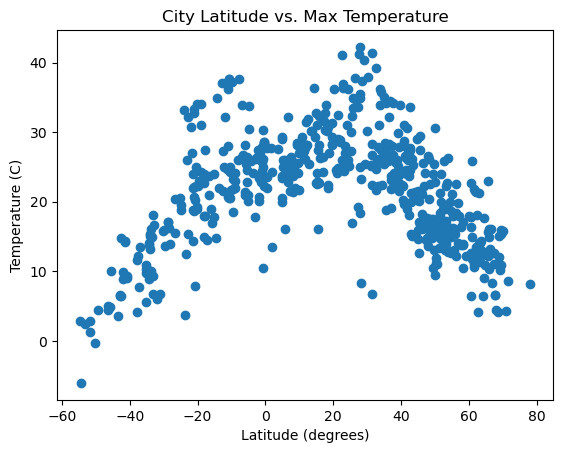

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

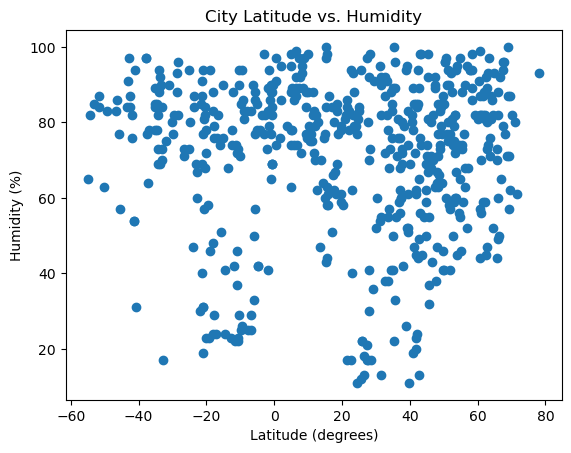

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

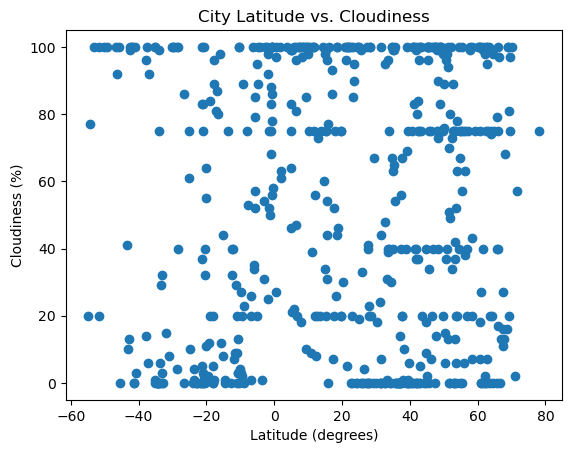

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

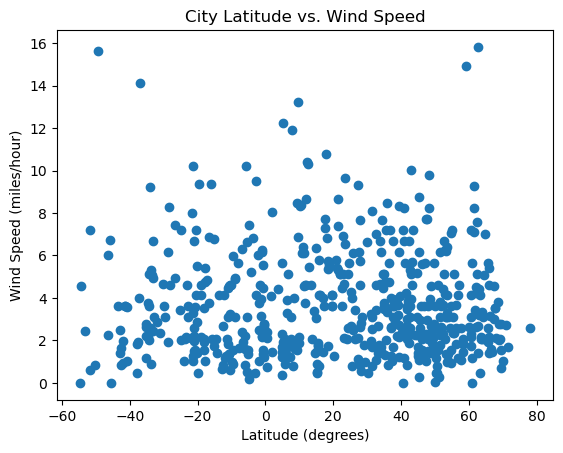

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (miles/hour)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linregressplot(y,x):
    slope, yint, r, p, std_err = linregress(x,y)
    line = slope*x+yint
    
    plt.scatter(x,y)
    plt.plot(x,line,color='r')
    plt.text(x.median(),y=y.median(),s=f'y = {round(slope,2)}x + {round(yint,2)}',color='r')
    plt.title(f'{x.name} vs {y.name}')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.show()
    
    print(f'The correlation between {x.name} and {y.name} is r = {r}')

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,badger,42.6144,-94.1462,27.46,65,75,3.60,US,Mon Aug 7 20:41:53 2023
4,gizo,29.9871,31.2118,30.23,52,0,6.63,EG,Mon Aug 7 20:41:53 2023
6,xichang,27.8964,102.2634,18.43,92,23,0.85,CN,Mon Aug 7 20:39:17 2023
7,fort bragg,35.1403,-79.1541,35.05,50,40,5.14,US,Mon Aug 7 20:41:55 2023
8,sinop,42.0266,35.1512,23.94,84,0,2.59,TR,Mon Aug 7 20:41:55 2023


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8061,-68.3185,2.83,65,20,0.00,AR,Mon Aug 7 20:41:50 2023
1,bom sucesso,-21.0324,-44.7598,20.66,31,0,1.50,BR,Mon Aug 7 20:41:52 2023
2,punta arenas,-53.1626,-70.9078,2.43,85,100,2.44,CL,Mon Aug 7 20:41:52 2023
5,waitangi,-35.2705,174.0805,10.89,84,100,2.61,NZ,Mon Aug 7 20:41:54 2023
11,namibe,-15.1951,12.1458,17.85,90,44,1.74,AO,Mon Aug 7 20:41:56 2023


###  Temperature vs. Latitude Linear Regression Plot

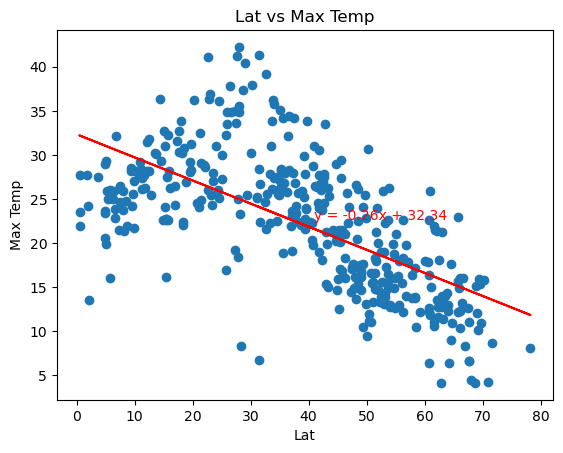

The correlation between Lat and Max Temp is r = -0.6451169195018043


In [19]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])

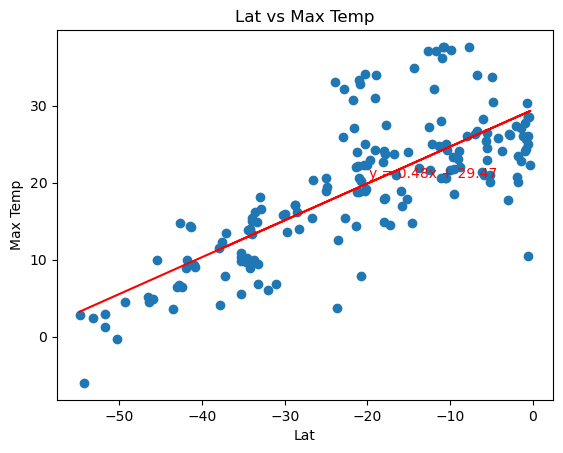

The correlation between Lat and Max Temp is r = 0.7656341736427918


In [20]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is a moderate negative correlation between temperature and latitude in the Northern Hemisphere, while there is a strong positive correlation between the same parameters in the Southern Hemisphere.The trends are clearly linear.

### Humidity vs. Latitude Linear Regression Plot

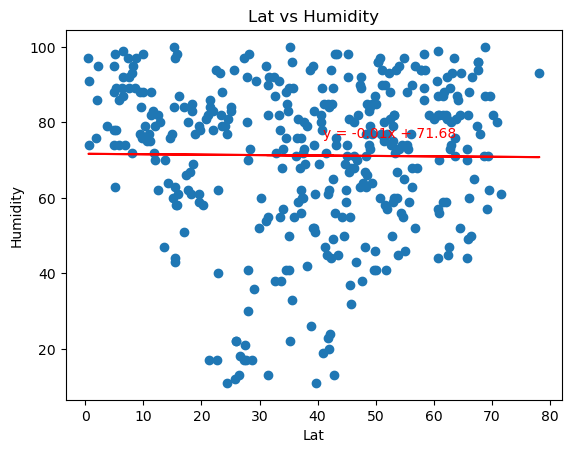

The correlation between Lat and Humidity is r = -0.01024239596342204


In [21]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])

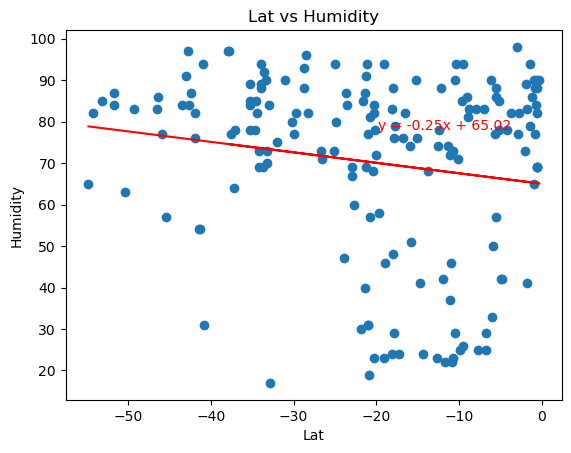

The correlation between Lat and Humidity is r = -0.16550888222275412


In [22]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, though there does appear to be more data in higher-humidity locales. 

### Cloudiness vs. Latitude Linear Regression Plot

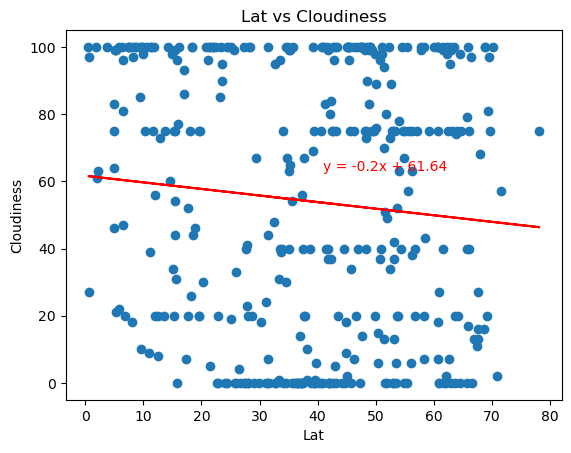

The correlation between Lat and Cloudiness is r = -0.0935002026356344


In [23]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'])

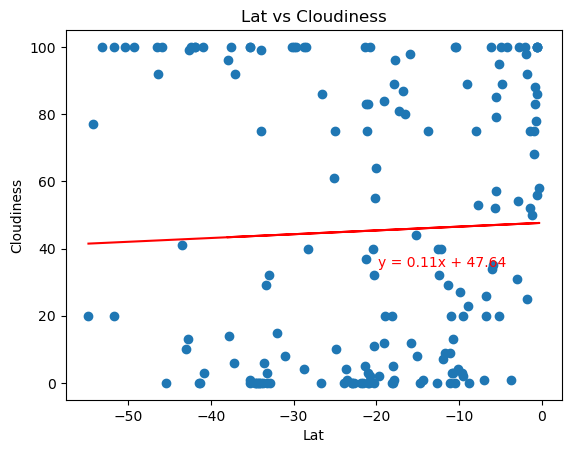

The correlation between Lat and Cloudiness is r = 0.04021076079643112


In [24]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, but there are an abundance of data points with either 0% or 100% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

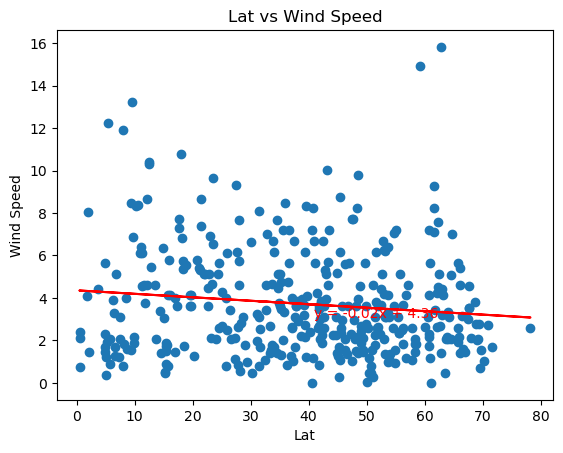

The correlation between Lat and Wind Speed is r = -0.12126915910337363


In [25]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'])

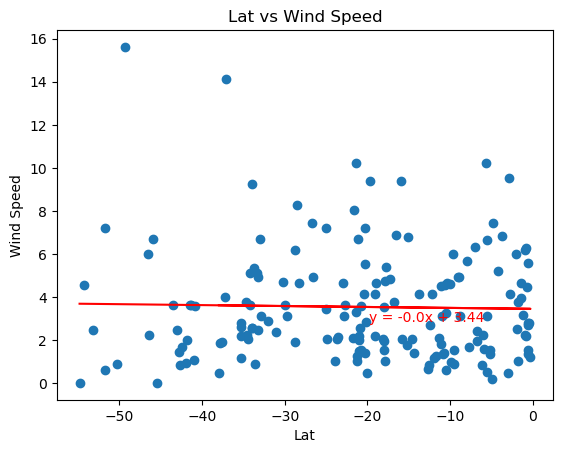

The correlation between Lat and Wind Speed is r = -0.024281512667781287


In [26]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets, though there is more data at locales with lower wind speeds.